# Lista de Exercícios #07

---
**Disciplina:** PMT07 – Transferência de Calor e Mecânica dos Fluidos Computacional 

**Aluno:** Abner Vieria Pereira

In [1]:
import numpy as np
import sympy as sy
import matplotlib.pyplot as plt
from IPython.display import Image, Math

## Enunciado

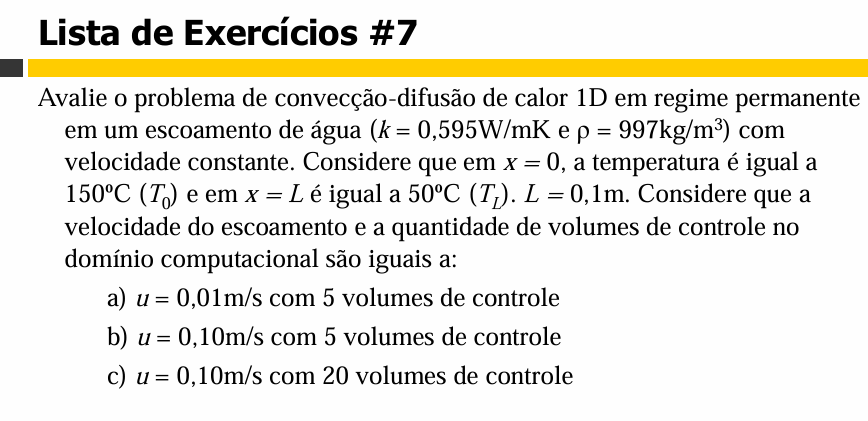

In [2]:
Image('L7_pt1.png',width=600)

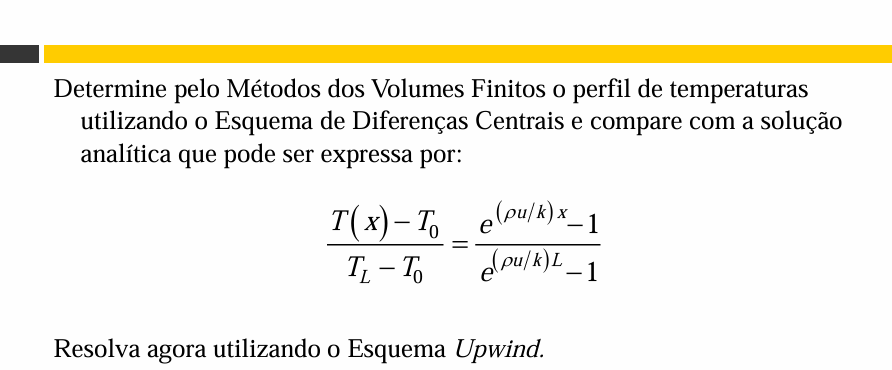

In [3]:
Image('L7_pt2.png',width=600)

## Discretização dos nós centrais considerando o esquema de Diferenças Centrais

O balanço de energia, considerando um problema de convecção-difusão, unidimensional e em regime permanente deve satisfazer a seguinte equação:

$$\frac{d}{dx} (\rho \, u \, T) = \frac{d}{dx}\left(k \, \frac{d T}{dx}\right)$$

$$(\rho \, u \, T)_e - (\rho \, u \, T)_w = \left(k \, \frac{d T}{dx}\right)_e - \left(k \, \frac{d T}{dx}\right)_w$$

Através da técnica de aproxição por um perfil linear por partes essas derivadas se transformam em:

$$(\rho \, u)_e \, \frac{(T_P + T_E)}{2} - (\rho \, u)_w \, \frac{(T_P + T_W)}{2} = \frac{k_e}{\delta x}_e (T_E - T_P) - \frac{k_w}{\delta x}_w (T_P - T_W)$$

Definindo $F = \rho \, u $ e $D = \frac{k}{\delta x} $, temos:

$$\frac{F_e}{2}(T_P + T_E) - \frac{F_w}{2}(T_P + T_W) = D_e(T_E - T_P) - D_w (T_P - T_W)$$

$$T_P \left( \frac{F_e}{2} - \frac{F_w}{2} + D_e + D_w \right) = T_E \left(D_e - \frac{F_e}{2} \right) + T_W \left(D_w + \frac{F_w}{2} \right)$$

Como o fluxo possui a mesma velocidade em todo o escoamento e o material é isotrópico, ou seja, $k = cte$, temos:

$$T_P (2D) = T_E \left(D - \frac{F}{2} \right) + T_W \left(D + \frac{F}{2} \right)$$

Assim, o a equação discretizada tradicional de CFD fica:

$$a_P T_P = a_E T_E + a_W T_W$$

Onde os coeficientes são:

| Coeficiente| Expressão |
| --- | --- |
| $a_P$ | $a_E + a_W$|
| $a_E$| $D - \frac{F}{2}$ |
| $a_W$ | $D + \frac{F_w}{2}$|


### Discretização do nó 2 - primeiro nó de fronteira

Nos nós de fronteira, existem duas particularidades que fazem o balanço de energia diferir do balanço de nós centrais: a temperatura é conhecida e o volume de controle dele é metade do volume dos nós centrais, assim:

$$\frac{F_e}{2}(T_P + T_E) - F_w T_W = D_e(T_E - T_P) - D_w(T_P - T_W) $$

Note que para a face oeste ($w$), que é a fronteira, não usamos a média $(T_W + T_P) / 2$, porque não existe o nó . Usamos diretamente o valor da fronteira: $T_W = T_0$

Na fronteira oeste, a distância entre o nó $P$ e a $w$ é $\delta x_w = \Delta x/2$ face é . Portanto, o coeficiente difusivo na face oeste torna-se: $D_w = \frac{k}{\delta x_w} = \frac{k}{\Delta x/2} = 2\frac{k}{\Delta x} = 2 D$

Substituindo esses termos na equação de balanço e assumindo o fluxo e a condutância constantes:

$$\frac{F}{2} (T_P + T_E) - F \,T_0 = D(T_E - T_P) - 2 D (T_P - T_0)$$

$$\frac{F}{2} T_P + \frac{F}{2}T_E - F \,T_0 = DT_E - DT_P - 2 D T_P - 2 D T_0$$

$$T_P\left(\frac{F}{2} + D + 2D \right) = T_E \left(D - \frac{F}{2}\right) + T_0(2D + F) $$

$$T_P\left(\frac{F}{2} + 3D \right) = T_E \left(D - \frac{F}{2}\right) + T_0(2D + F) $$

Assim, o formato padrão algébrico utilizado no CFD é:

$$a_P T_P = a_E T_E + S_C $$

Onde os coeficientes são:

|Coeficiente|Expressão|
| --- | --- |
| $a_W$ | 0 |
| $a_E$ | $D - \frac{F}{2}$  |
| $a_P$ | $\frac{F}{2} + 3D = a_E + (2D + F)$|
| $S_C$ | $(2D + F)T_0$|


### Discretização do penúltimo nó - último de fronteira




Analogamente ao nó 2, podemos escrever a seguinte equação para o penúltimo nó:

$$a_P T_P = a_W T_W + S_C $$

| Coeficiente | Expressão |
| --- | --- |
| $a_W$ | $D - \frac{F}{2}$  |
| $a_E$ | 0  |
| $a_P$ | $a_W + (2D + F)$  |
| $S_C$ | $(2D + F)T_L$  |

#### Caso (a) u = 0,01m/s com 5 volumes de controle

In [4]:
# Parâmetros físicos do problema
k = 0.595
rho = 997
T_0 = 150
T_L = 50
u_1 = 0.01

# Parâmetros geométricos
L = 0.1

# Parâmetros da malha
nv = 5
n_nos = nv + 2
dx = L / nv

Text(0.5, 0, 'Nós')

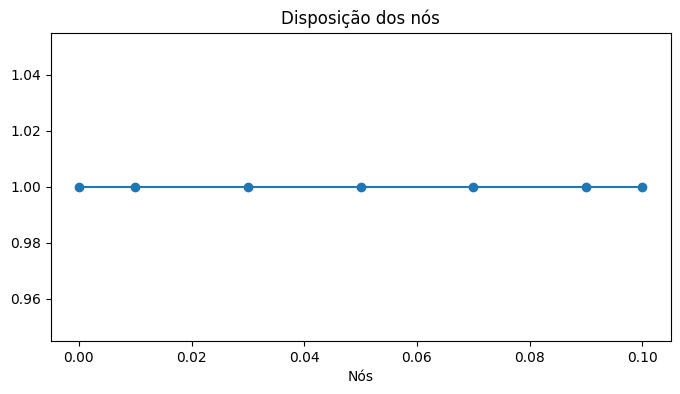

In [5]:
# Criando a malha
x_nodes = np.zeros(n_nos)
x_nodes[0] = 0
x_nodes[1] = dx/2

for i in range(2, n_nos - 2):
    x_nodes[i] = (dx/2) + (i - 1)*dx

x_nodes[n_nos - 2] = L - (dx/2)
x_nodes[n_nos - 1] = L

y_teste = np.ones(n_nos)
plt.figure(figsize=(8,4))
plt.plot(x_nodes, y_teste, 'o-')
plt.title('Disposição dos nós')
plt.xlabel('Nós')

In [6]:
# Inicialização
T = np.zeros(n_nos)     # Vetor contendo as temperaturas dos nós
T[0] = T_0              # Temperatura em x = 0
T[n_nos - 1] = T_L      # Temperatura em x = 0.1

T

array([150.,   0.,   0.,   0.,   0.,   0.,  50.])

In [7]:
D = k / dx      # Condutância
F = rho * u_1   # Fluxo mássico

In [8]:
# Vetores para os coeficientes
ae = np.zeros(n_nos)
aw = np.zeros(n_nos)
ap = np.zeros(n_nos)
sc = np.zeros(n_nos)

#  Coeficientes do nó 1 - primeiro de fronteira
aw[1] = 0
ae[1] = D - F/2
ap[1] = ae[1] + (2*D + F)
sc[1] = (2*D + F) * T_0

# Ceficientes dos nós centrais
for i in range (2, n_nos - 2):
    ae[i] = D - (F/2)
    aw[i] = D + (F/2)
    ap[i] = aw[i] + ae[i] + (F - F) # F_e - F_w = 0 para u constante
    sc[i] = 0

# Coeficientes do penúltimo nó - último de fronteira
aw[n_nos - 2] = D + F/2
ae[n_nos - 2] = 0
ap[n_nos - 2] = aw[n_nos - 2] + (2*D - F)
sc[n_nos - 2] = (2*D - F) * T_L

In [9]:
# Criando os vetores da matriz TDMA
a = ap
b = ae
c = aw
d = sc
Q = np.zeros(n_nos)
P = np.zeros(n_nos)

# Inicialização do algoritmo TDMA
P[1] = b[1] / a[1]
Q[1] = d[1] / a[1]

for i in range(2, n_nos-1):
    denom = a[i] - c[i] * P[i-1]
    P[i] = b[i] / denom
    Q[i] = (d[i] + c[i] * Q[i-1]) / denom

T[n_nos - 2] = Q[n_nos - 2]
for i in range(n_nos - 2, 0, -1):
    T[i] = (P[i] * T[i+1]) + Q[i]

T


array([150.        , 146.21588408, 135.60080097, 120.71225213,
        99.82980741,  70.54041844,  50.        ])

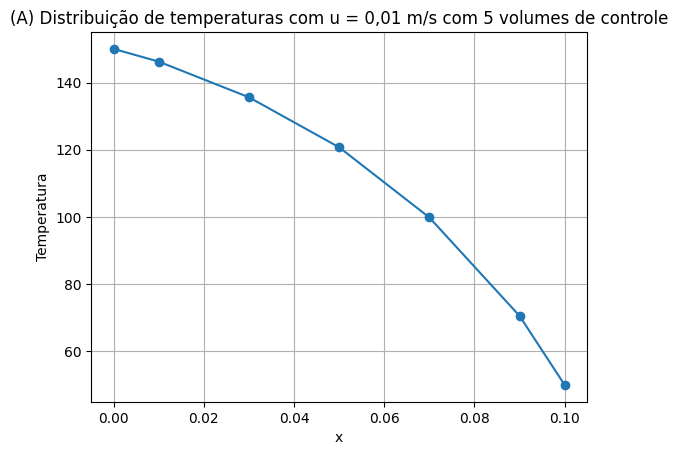

In [10]:
plt.figure()
plt.plot(x_nodes, T, 'o-')
plt.title('(A) Distribuição de temperaturas com u = 0,01 m/s com 5 volumes de controle')
plt.ylabel('Temperatura')
plt.xlabel('x')
plt.grid(True)
plt.show()


#### Caso (b) u = 0,10m/s com 5 volumes de controle

In [11]:
# Velocidade em b
u_b = 0.1

F_b = rho * u_b  # Alteração no fluxo mássico

In [12]:
# Inicializando um novo vetor de temperaturas
T_B = np.zeros(n_nos)
T_B[0] = T_0              # Temperatura em x = 0
T_B[n_nos - 1] = T_L      # Temperatura em x = 0.1

T_B

array([150.,   0.,   0.,   0.,   0.,   0.,  50.])

In [13]:
ae_b = np.zeros(n_nos)
aw_b = np.zeros(n_nos)
ap_b = np.zeros(n_nos)
sc_b = np.zeros(n_nos)

aw_b[1] = 0
ae_b[1] = D - F_b/2
ap_b[1] = ae_b[1] + (2*D + F_b)
sc_b[1] = (2*D + F_b) * T_0

# Ceficientes dos nós centrais
for i in range (2, n_nos - 2):
    ae_b[i] = D - (F_b/2)
    aw_b[i] = D + (F_b/2)
    ap_b[i] = aw_b[i] + ae_b[i] 
    sc_b[i] = 0

# Penúltimo nó - último de fronteira
aw_b[n_nos - 2] = D + F_b/2
ae_b[n_nos - 2] = 0
ap_b[n_nos - 2] = aw_b[n_nos - 2] + (2*D - F_b)
sc_b[n_nos - 2] = (2*D - F_b) * T_L

In [14]:
# Criando os vetores da matriz TDMA
a_b = ap_b
b_b = ae_b
c_b = aw_b
d_b = sc_b
Q_b = np.zeros(n_nos)
P_b = np.zeros(n_nos)
P_b[1] = b_b[1] / a_b[1]
Q_b[1] = d_b[1] / a_b[1]

# Iniciando o algoritmo TDMA
for i in range(2, n_nos-1):
    denom = a_b[i] - c_b[i] * P_b[i-1]
    P_b[i] = b_b[i] / denom
    Q_b[i] = (d_b[i] + c_b[i] * Q_b[i-1]) / denom

T_B[n_nos - 2] = Q_b[n_nos - 2]
for i in range(n_nos - 2, 0, -1):
    T_B[i] = (P_b[i] * T_B[i+1]) + Q_b[i]

T_B

array([150.        , 150.1718492 , 148.81073515, 154.20101764,
       132.85442632, 217.39117601,  50.        ])

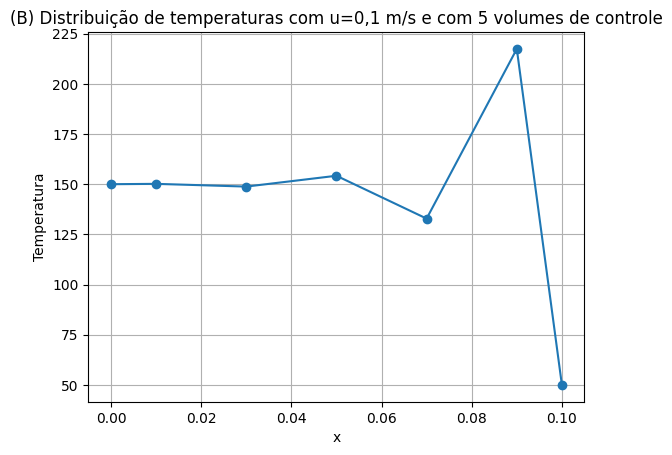

In [15]:
plt.figure()
plt.plot(x_nodes, T_B, 'o-')
plt.title('(B) Distribuição de temperaturas com u=0,1 m/s e com 5 volumes de controle')
plt.xlabel('x')
plt.ylabel('Temperatura')
plt.grid(True)
plt.show()


#### Caso (c) u = 0,10m/s com 20 volumes de controle

In [16]:
nv_c = 20   # Número de volumes de controle = 20
u_c = 0.1   # Velocidade do escoamento = 0.1 m/s

# Parâmetros da malha da letra C
n_nos_c = nv_c + 2
dx_c = L / nv_c

Text(0.5, 0, 'Nós')

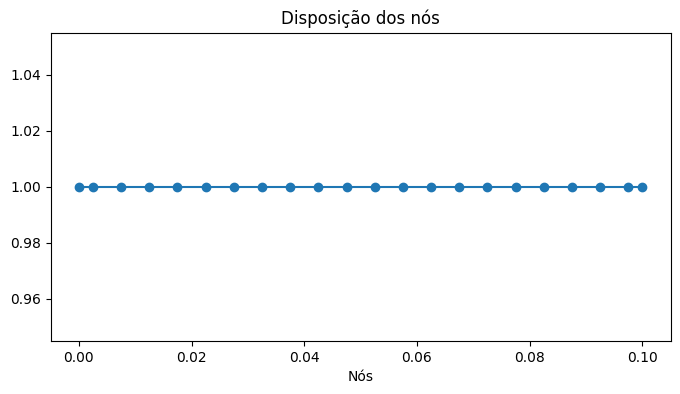

In [17]:
x_nodes_c = np.zeros(n_nos_c)
x_nodes_c[0] = 0
x_nodes_c[1] = dx_c/2

for i in range(2, n_nos_c - 2):
    x_nodes_c[i] = (dx_c/2) + (i - 1)*dx_c

x_nodes_c[n_nos_c - 2] = L - (dx_c/2)
x_nodes_c[n_nos_c - 1] = L

y_teste_c = np.ones(n_nos_c)
plt.figure(figsize=(8,4))
plt.plot(x_nodes_c, y_teste_c, 'o-')
plt.title('Disposição dos nós')
plt.xlabel('Nós')

In [18]:
u_c = 0.1
F_C = rho * u_c
D_C = k / dx_c

In [19]:
T_C = np.zeros(n_nos_c)
T_C[0] = T_0
T_C[n_nos_c - 1] = T_L
T_C

array([150.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  50.])

In [20]:
aw_c = np.zeros(n_nos_c)
ae_c = np.zeros(n_nos_c)
ap_c = np.zeros(n_nos_c)
sc_c = np.zeros(n_nos_c)

aw_c[1] = 0
ae_c[1] = D_C - F_C/2
ap_c[1] = ae_c[1] + (2*D_C + F_C)
sc_c[1] = (2*D_C + F_C) * T_0

# Ceficientes dos nós centrais
for i in range (2, n_nos_c - 2):
    ae_c[i] = D_C - (F_C/2)
    aw_c[i] = D_C + (F_C/2)
    ap_c[i] = aw_c[i] + ae_c[i] + (F_C - F_C) # F_e - F_w = 0 para u constante
    sc_c[i] = 0

# Penúltimo nó - último de fronteira
aw_c[n_nos_c - 2] = D_C + F_C/2
ae_c[n_nos_c - 2] = 0
ap_c[n_nos_c - 2] = aw_c[n_nos_c - 2] + (2*D_C - F_C)
sc_c[n_nos_c - 2] = (2*D_C - F_C) * T_L

In [21]:
# Criando os vetores da matriz TDMA
a_c = ap_c
b_c = ae_c
c_c = aw_c
d_c = sc_c
Q_c = np.zeros(n_nos_c)
P_c = np.zeros(n_nos_c)

# Inicializando o algoritmo TDMA
P_c[1] = b_c[1] / a_c[1]
Q_c[1] = d_c[1] / a_c[1]

for i in range(2, n_nos_c-1):
    denom = a_c[i] - c_c[i] * P_c[i-1]
    P_c[i] = b_c[i] / denom
    Q_c[i] = (d_c[i] + c_c[i] * Q_c[i-1]) / denom

T_C[n_nos_c - 2] = Q_c[n_nos_c - 2]
for i in range(n_nos_c - 2, 0, -1):
    T_C[i] = (P_c[i] * T_C[i+1]) + Q_c[i]

T_C

array([150.        , 149.99999926, 149.99999566, 149.99998686,
       149.99996538, 149.99991292, 149.99978483, 149.99947206,
       149.99870834, 149.9968435 , 149.99228995, 149.98117111,
       149.95402121, 149.88772676, 149.72584943, 149.33057846,
       148.36540848, 146.00866301, 140.25397792, 126.20222698,
        91.89075704,  50.        ])

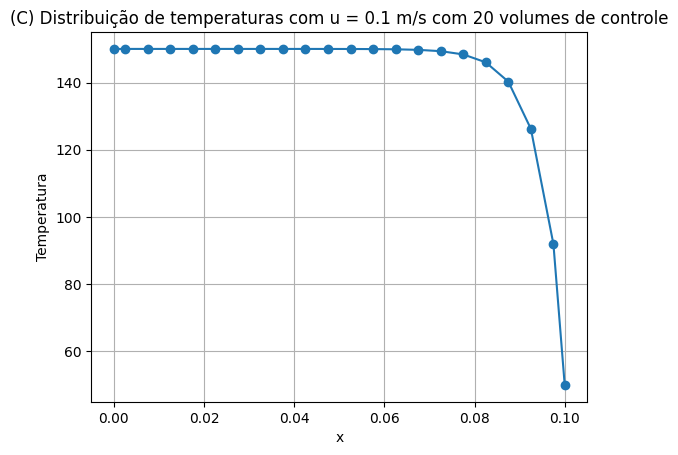

In [22]:
plt.figure()
plt.plot(x_nodes_c, T_C, 'o-')
plt.title('(C) Distribuição de temperaturas com u = 0.1 m/s com 20 volumes de controle')
plt.ylabel('Temperatura')
plt.xlabel('x')
plt.grid(True)
plt.show()

## Solução Analítica

A solução analítica foi obtida a partir do auxílio da biblioteca simbólica do python: a sympy.
A simulação é feita considerando as duas velocidades propostas, no caso (a), onde u = 0,01 m/s e nos casos (b) e (c), os quais u = 0,1 m/s, pois o número de volumes de controle não gera impacto na solução analítica.

In [23]:
# Equação analítica
T_sim,T0, TL, rho, u, k, x, L = sy.symbols('T T_0 T_L rho u k x L')

eq_ana = sy.Eq((T_sim - T0) / (TL - T0) , (sy.exp(((rho * u)/k) * x) - 1) / (sy.exp((rho * u / k)*L) - 1))
eq_ana

Eq((T - T_0)/(-T_0 + T_L), (exp(rho*u*x/k) - 1)/(exp(L*rho*u/k) - 1))

In [24]:
T_sol = sy.solve(eq_ana, T_sim)[0]
T_sol

(T_0*exp(L*rho*u/k) - T_0*exp(rho*u*x/k) + T_L*exp(rho*u*x/k) - T_L)/(exp(L*rho*u/k) - 1)

In [25]:
params = {
    rho: 997,
    u: 0.01,
    k: 0.595,
    L: 0.1,
    T0: 150,
    TL: 50
}

In [26]:
# Transformando em função numérica
# Passamos os símbolos que queremos que sejam argumentos da função
f_num = sy.lambdify(x, T_sol.subs(params), 'numpy')

- Caso (a): u = 0,01 m/s:

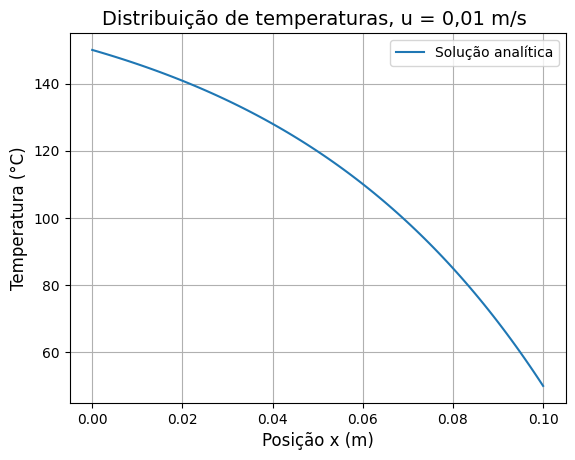

In [27]:
x_analitico = np.linspace(0, 0.1, 100)
T_analitico = f_num(x_analitico)
plt.figure()
plt.plot(x_analitico, T_analitico, linewidth=1.5, label='Solução analítica')
plt.title('Distribuição de temperaturas, u = 0,01 m/s ', fontsize=14)
plt.xlabel('Posição x (m)', fontsize=12)
plt.ylabel('Temperatura (°C)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

In [28]:
params_2 = {
    rho: 997,
    u: 0.1,
    k: 0.595,
    L: 0.1,
    T0: 150,
    TL: 50
}

In [29]:
f_num_2 = sy.lambdify(x, T_sol.subs(params_2), 'numpy')

- Casos (b) e (c): u = 0,1 m/s.

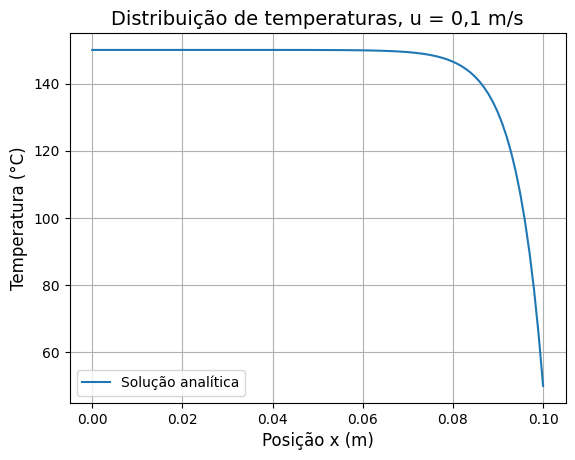

In [30]:
x_analitico_2 = np.linspace(0, 0.1, 100)
T_analitico_2 = f_num_2(x_analitico_2)
plt.figure()
plt.plot(x_analitico_2, T_analitico_2, linewidth=1.5, label='Solução analítica')
plt.title('Distribuição de temperaturas, u = 0,1 m/s', fontsize=14)
plt.xlabel('Posição x (m)', fontsize=12)
plt.ylabel('Temperatura (°C)', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

# Formulação usando o Esquema *Upwind*

No esquema *Upwind*, a equação discretizada para os nós centrais apresenta o seguinte formato:

$$a_P T_P = a_E T_E + a_W T_W$$

Onde os coeficientes são:

|Coeficiente|Expressão|
|---|---|
| $a_E$ | $D + \| - F, 0\|$| 
| $a_W$| $D + \|  F, 0\|$| 
| $a_P$ | $a_E + a_W$| 

Enquanto para os nós de fronteira, usando uma lógica parecida à empregada no esquema de **Diferenças Centrais**, temos:

- Para o priemiro nó de fronteira:

$$a_P T_P = a_E T_E + S_C$$

Onde os coeficientes são:

| Coeficiente | Expressão |
| --- | --- |
| $a_W$ |  $0$ |
| $a_E$ |  $D + \|-F,0 \|$ |
| $a_P$ |  $a_E + (2D + \| F, 0 \|)$ |
| $S_C$|  $(2D + \| F, 0 \|) \, T_0 $|


- Para o último nó de fronteira:

$$a_P T_P = a_W T_W + S_C$$

Onde os coeficientes são:

| Coeficiente | Expressão |
| --- | --- |
| $a_W$ | $D + \|F,0 \|$  |
| $a_E$ | $0$  |
| $a_P$ | $a_W + (2D + \| -F, 0 \|)$  |
| $S_C$| $(2D + \| -F, 0 \|) \, T_L $ |

### Caso (a) u = 0,01 m/s com 5 volumes de controle

In [31]:
T_u1 = np.zeros(n_nos)

T_u1[0] = T_0              
T_u1[n_nos - 1] = T_L

# Vetores para os coeficientes (u=1)
ae_u1 = np.zeros(n_nos)
aw_u1 = np.zeros(n_nos)
ap_u1 = np.zeros(n_nos)
sc_u1 = np.zeros(n_nos)

# Coeficientes do nó 1 - primeiro de fronteira
aw_u1[1] = 0
ae_u1[1] = D + max(-F,0)
ap_u1[1] = ae_u1[1] + (2*D + max(F,0))
sc_u1[1] = (2*D + max(F,0)) * T_0

# Coeficientes dos nós centrais
for i in range(2, n_nos - 2):
    ae_u1[i] = D + max(-F,0)
    aw_u1[i] = D + max(F, 0)
    ap_u1[i] = aw_u1[i] + ae_u1[i] 
    sc_u1[i] = 0

# Coeficientes do penúltimo nó - último de fronteira
aw_u1[n_nos - 2] = D + max(F,0)
ae_u1[n_nos - 2] = 0
ap_u1[n_nos - 2] = aw_u1[n_nos - 2] + (2*D + max(-F,0))
sc_u1[n_nos - 2] = (2*D +max(-F,0)) * T_L

In [32]:
# Criando os vetores da matriz TDMA
a = ap_u1
b = ae_u1
c = aw_u1
d = sc_u1
Q = np.zeros(n_nos)
P = np.zeros(n_nos)

# Inicialização do algoritmo TDMA
P[1] = b[1] / a[1]
Q[1] = d[1] / a[1]

for i in range(2, n_nos-1):
    denom = a[i] - c[i] * P[i-1]
    P[i] = b[i] / denom
    Q[i] = (d[i] + c[i] * Q[i-1]) / denom

T_u1[n_nos - 2] = Q[n_nos - 2]
for i in range(n_nos - 2, 0, -1):
    T_u1[i] = (P[i] * T_u1[i+1]) + Q[i]

T_u1

array([150.        , 144.97051498, 133.2260335 , 117.54567033,
        96.61040898,  68.65919618,  50.        ])

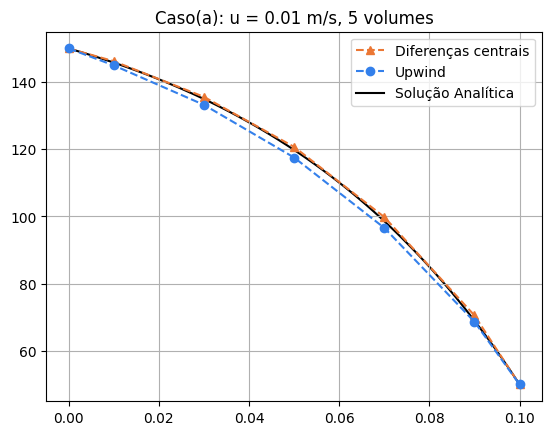

In [33]:
plt.figure()
plt.plot(x_nodes, T, '^--', label='Diferenças centrais', color = '#eb7734', zorder=2)
plt.plot(x_nodes, T_u1,'o--', label='Upwind', color='#3480eb')
plt.plot(x_analitico, T_analitico, '-', color='black', label='Solução Analítica',linewidth=1.5, zorder=1)
plt.title('Caso(a): u = 0.01 m/s, 5 volumes')
plt.grid(True)
plt.legend()
plt.show()

In [34]:
pe_1 = F / D
display(Math(r'\text{O número de Péclet para o caso (a) é igual a }  %.2f' % pe_1))

<IPython.core.display.Math object>

### Discussão:

Nesse caso, tanto o esquema de Diferenças Centrais quanto o *Upwind* produziram resultados que se aproximam da solução analítica, sendo que o de Diferenças Centrais apresentou uma precisão ligereiramente maior.

### Caso (b) u = 0,10 m/s com 5 volumes de controle

In [35]:
T_u2 = np.zeros(n_nos)

T_u2[0] = T_0
T_u2[n_nos - 1] = T_L

# Vetores para os coeficientes (u=1)
ae_u2 = np.zeros(n_nos)
aw_u2 = np.zeros(n_nos)
ap_u2 = np.zeros(n_nos)
sc_u2 = np.zeros(n_nos)

# Coeficientes do nó 1 - primeiro de fronteira
aw_u2[1] = 0
ae_u2[1] = D + max(-F_b,0)
ap_u2[1] = ae_u2[1] + (2*D + max(F_b,0))
sc_u2[1] = (2*D + max(F_b,0)) * T_0

# Coeficientes dos nós centrais
for i in range(2, n_nos - 2):
    ae_u2[i] = D + max(-F_b,0)
    aw_u2[i] = D + max(F_b, 0)
    ap_u2[i] = aw_u2[i] + ae_u2[i] 
    sc_u2[i] = 0

# Coeficientes do penúltimo nó - último de fronteira
aw_u2[n_nos - 2] = D + max(F_b,0)
ae_u2[n_nos - 2] = 0
ap_u2[n_nos - 2] = aw_u2[n_nos - 2] + (2*D + max(-F_b,0))
sc_u2[n_nos - 2] = (2*D +max(-F_b,0)) * T_L

In [36]:
# Criando os vetores da matriz TDMA
a = ap_u2
b = ae_u2
c = aw_u2
d = sc_u2
Q = np.zeros(n_nos)
P = np.zeros(n_nos)

# Inicialização do algoritmo TDMA
P[1] = b[1] / a[1]
Q[1] = d[1] / a[1]

for i in range(2, n_nos-1):
    denom = a[i] - c[i] * P[i-1]
    P[i] = b[i] / denom
    Q[i] = (d[i] + c[i] * Q[i-1]) / denom

T_u2[n_nos - 2] = Q[n_nos - 2]
for i in range(n_nos - 2, 0, -1):
    T_u2[i] = (P[i] * T_u2[i+1]) + Q[i]

T_u2

array([150.        , 149.93468169, 149.58514642, 148.06422738,
       141.44631242, 112.65004045,  50.        ])

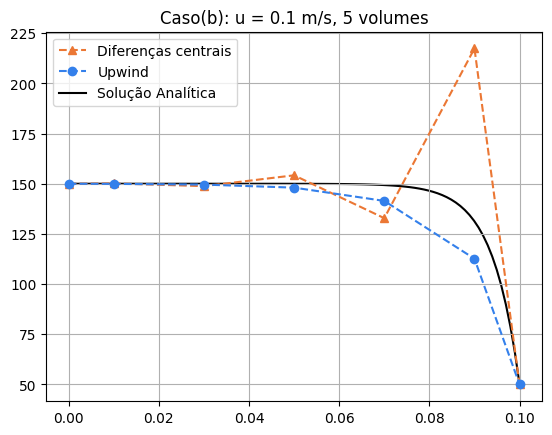

In [37]:
plt.figure()
plt.plot(x_nodes, T_B, '^--', label='Diferenças centrais', color = '#eb7734', zorder=2)
plt.plot(x_nodes, T_u2,'o--', label='Upwind', color='#3480eb')
plt.plot(x_analitico_2, T_analitico_2, '-', color='black', label='Solução Analítica',linewidth=1.5, zorder=1)
plt.title('Caso(b): u = 0.1 m/s, 5 volumes')
plt.grid(True)
plt.legend()
plt.show()

In [38]:
pe_2 = F_b/D
display(Math(r'\text{O número de Péclet para o caso (a) é igual a }  %.2f' % pe_2))

<IPython.core.display.Math object>

### Discussão:

Com o aumento da velocidade do escoamento, mantendo-se inalterados os demais parâmetros do problema, o número de Péclet local atingiu o valor de 3,35, ultrapassando o limite de |Pe| = 2, tendo em vista que, segundo Patankar (1980), o esquema de diferenças centrais produz soluções fisicamente consistentes apenas para números de Péclet locais com módulo inferior a 2. Para valores superiores, o método pode apresentar oscilações não físicas, associadas à perda de positividade dos coeficientes da equação discretizada.

Nesse caso específico, observou-se o surgimento de oscilações não físicas significativas, próximo à fronteira de saída, evidenciando a instabilidade do esquema de diferenças centrais em regimes dominados pela convecção quando se utilizam malhas relativamente grosseiras.

Por outro lado, o esquema *Upwind* apresentou comportamento estável para o mesmo conjunto de parâmetros, mas mesmo assim ainda está um pouco afastado da solução analítica.

### Caso (c) u = 0,10 m/s com 20 volumes de controle

In [39]:
T_u3 = np.zeros(n_nos_c)
T_u3[0] = T_0
T_u3[n_nos_c - 1] = T_L

# Vetores para os coeficientes (u=1)
ae_u3 = np.zeros(n_nos_c)
aw_u3 = np.zeros(n_nos_c)
ap_u3 = np.zeros(n_nos_c)
sc_u3 = np.zeros(n_nos_c)

# Coeficientes do nó 1 - primeiro de fronteira
aw_u3[1] = 0
ae_u3[1] = D_C + max(-F_C,0)
ap_u3[1] = ae_u3[1] + (2*D_C + max(F_C,0))
sc_u3[1] = (2*D_C + max(F_C,0)) * T_0

# Coeficientes dos nós centrais
for i in range(2, n_nos_c - 2):
    ae_u3[i] = D_C + max(-F_C,0)
    aw_u3[i] = D_C + max(F_C, 0)
    ap_u3[i] = aw_u3[i] + ae_u3[i] 
    sc_u3[i] = 0

# Coeficientes do penúltimo nó - último de fronteira
aw_u3[n_nos_c - 2] = D_C + max(F_C,0)
ae_u3[n_nos_c - 2] = 0
ap_u3[n_nos_c - 2] = aw_u3[n_nos_c - 2] + (2*D_C + max(-F_C,0))
sc_u3[n_nos_c - 2] = (2*D_C + max(-F_C,0)) * T_L

In [40]:
# Criando os vetores da matriz TDMA
a_c = ap_u3
b_c = ae_u3
c_c = aw_u3
d_c = sc_u3
Q_c = np.zeros(n_nos_c)
P_c = np.zeros(n_nos_c)

# Inicializando o algoritmo TDMA
P_c[1] = b_c[1] / a_c[1]
Q_c[1] = d_c[1] / a_c[1]

for i in range(2, n_nos_c-1):
    denom = a_c[i] - c_c[i] * P_c[i-1]
    P_c[i] = b_c[i] / denom
    Q_c[i] = (d_c[i] + c_c[i] * Q_c[i-1]) / denom

T_u3[n_nos_c - 2] = Q_c[n_nos_c - 2]
for i in range(n_nos_c - 2, 0, -1):
    T_u3[i] = (P_c[i] * T_u3[i+1]) + Q_c[i]

T_u3

array([150.        , 149.99980209, 149.99924044, 149.99820824,
       149.99631125, 149.99282493, 149.98641773, 149.97464246,
       149.9530017 , 149.91322999, 149.84013694, 149.70580542,
       149.45892892, 149.00521555, 148.17137427, 146.63892815,
       143.82257548, 138.64663994, 129.13422733, 111.65217154,
        79.52338497,  50.        ])

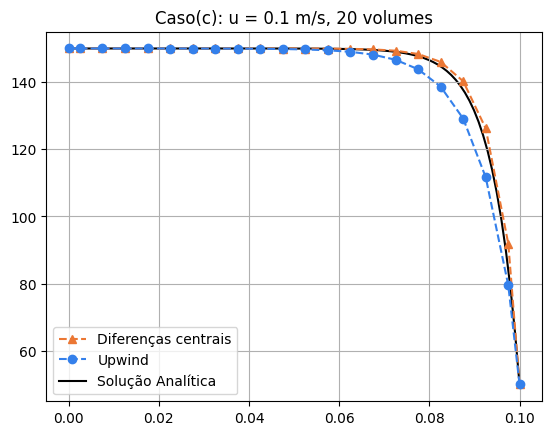

In [41]:
plt.figure()
plt.plot(x_nodes_c, T_C, '^--', label='Diferenças centrais', color = '#eb7734', zorder=2)
plt.plot(x_nodes_c, T_u3,'o--', label='Upwind', color='#3480eb')
plt.plot(x_analitico_2, T_analitico_2, '-', color='black', label='Solução Analítica',linewidth=1.5, zorder=1)
plt.title('Caso(c): u = 0.1 m/s, 20 volumes')
plt.grid(True)
plt.legend()
plt.show()

In [42]:
pe_3 = F_C / D_C
display(Math(r'\text{O número de Péclet para o caso (a) é igual a }  %.2f' % pe_3))

<IPython.core.display.Math object>

### Discussão:

Nesse caso, a velocidade é relativamente alta, como no Caso (b), contudo o número de volumes de controle foi aumentado de 5 para 20, reduzindo $\Delta x$ e, por conseguinte, o número de Peclet, que passou a ser 0,84 (novamente abaixo de 2). Assim, com o refinamento da malha, o esquema de Diferenças Centrais não apresneta mais oscilações e se aproxima muito bem da solução analítica. Ressalta-se que o esquema *Upwind* também melhora sua precisão.

## Discussão Geral 

Os resultados demonstram claramente a importância do Número de Peclet na escolha e no desempenho dos esquemas numéricos para problemas de convecção-difusão:

**- Pe < 2:** Ambos os esquemas (Diferenças Centrais e *Upwind*) fornecem soluções razoáveis, com o Diferenças Centrais sendo ligeiramente mais preciso. 

**- Pe > 2**: O esquema de Diferenças Centrais torna-se instável, gerando oscilações fisicamente incoerentes, o que o torna inadequado. O esquema *Upwind*, embora mais estável, ainda ficou um pouco longe da solução analítica.

Além disso, percebeu-se que o refinamento da malha é uma estratégia eficaz para reduzir o número de Peclet de malha e melhorar a precisão de ambos os esquemas, especialmente eliminando as oscilações do esquema de Diferenças Centrais.

## Conclusão

O problema de convecção-difusão 1D foi resolvido com sucesso utilizando o Método dos Volumes Finitos com os esquemas de Diferenças Centrais e *Upwind*. A comparação com a solução analítica e a análise do número de Peclet de malha permitiram observar as características de cada esquema: a precisão do esquema de Diferenças Centrais em baixos Peclet e sua instabilidade em altos Peclet, e a estabilidade do *Upwind* em qualquer Peclet. Por fim, constatou-se que o refinamento da malha mostrou-se crucial para a obtenção de soluções precisas e fisicamente coerentes.

## Referências Bibliográficas

- PATANKAR, Suhas V. Numerical heat transfer and fluid flow. New York: Hemisphere Publishing Corporation, 1980.